# Jupyter with PostgreSQL

## Libararies and Settings

In [1]:
# Libraries
import os
import psycopg2
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

# Settings
import warnings
warnings.filterwarnings("ignore")

# Current working directory
print(os.getcwd())

/


## Create database connection

In [2]:
conn = psycopg2.connect("host=localhost dbname=app user=app_user password=app_password")

## Read data

In [3]:
df = pd.read_csv('/workspace/apartments_data_prepared.csv', sep=',')
df.head(5)

,web-scraper-order,web-scraper-start-url,rooms_area_price_raw,address_raw,price_raw,description_raw,text_raw,rooms,area,price
0,1662023695-433,https://www.immoscout24.ch/de/wohnung/mieten/k...,"3,5 Zimmer, 122 m², CHF 3180.—","Sunnenbergstrasse 15, 8633 Wolfhausen, ZH",CHF 3180.—,"«Grosse Galerie, Terrasse mit Pergola, Berg- u...","3,5 Zimmer, 122 m², CHF 3180.—Sunnenbergstrass...",3.5,122.0,3180.0
1,1662023745-820,https://www.immoscout24.ch/de/wohnung/mieten/k...,"2,5 Zimmer, 78 m², CHF 3760.—","Lavaterstr. 63, 8002 Zürich, ZH",CHF 3760.—,«Wunderschöne Wohnung im Enge-Quartier»,"2,5 Zimmer, 78 m², CHF 3760.—Lavaterstr. 63, 8...",2.5,78.0,3760.0
2,1662023742-807,https://www.immoscout24.ch/de/wohnung/mieten/k...,"5,5 Zimmer, 115 m², CHF 2860.—","Langfurrenstrasse 5c, 8623 Wetzikon ZH, ZH",CHF 2860.—,«Wohnmomente zum Festhalten»,"5,5 Zimmer, 115 m², CHF 2860.—Langfurrenstrass...",5.5,115.0,2860.0
3,1662023804-1290,https://www.immoscout24.ch/de/wohnung/mieten/k...,"3,5 Zimmer, 74 m², CHF 2165.—","Sandbuckweg 5A, 8157 Dielsdorf, ZH",CHF 2165.—,"«3,5 pièces, 74 m²»","top3,5 Zimmer, 74 m², CHF 2165.—Sandbuckweg 5A...",3.5,74.0,2165.0
4,1662023739-771,https://www.immoscout24.ch/de/wohnung/mieten/k...,"5,5 Zimmer, 195 m², CHF 6900.—","Parkring 59, 8002 Zürich, ZH",CHF 6900.—,«Wohnanlage Im Parkring - Exklusive Wohnung zu...,"5,5 Zimmer, 195 m², CHF 6900.—Parkring 59, 800...",5.5,195.0,6900.0


## Write data to database

In [4]:
engine = create_engine('postgresql://app_user:app_password@db:5432/postgres')
df.to_sql('apartment_table', engine, if_exists='replace')

8

## Make SQL query

In [5]:
df_sub = pd.read_sql_query('''SELECT
                             address_raw,
                             rooms,
                             area,
                             price
                             FROM apartment_table''', 
                          con=engine)
df_sub.head()

,address_raw,rooms,area,price
0,"Sunnenbergstrasse 15, 8633 Wolfhausen, ZH",3.5,122.0,3180.0
1,"Lavaterstr. 63, 8002 Zürich, ZH",2.5,78.0,3760.0
2,"Langfurrenstrasse 5c, 8623 Wetzikon ZH, ZH",5.5,115.0,2860.0
3,"Sandbuckweg 5A, 8157 Dielsdorf, ZH",3.5,74.0,2165.0
4,"Parkring 59, 8002 Zürich, ZH",5.5,195.0,6900.0


## Plot apartment prices

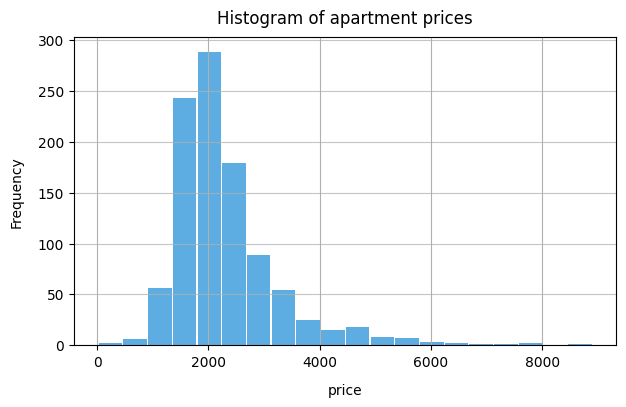

In [6]:
# Plot Histogram
fig = plt.figure( figsize=(7,4))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
n, bins, patches = plt.hist(x=df['price'], 
                            bins=20, 
                            color='#5DADE2',
                            alpha=1.00, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('price', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Histogram of apartment prices', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [7]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.2.0-1018-azure
Datetime: 2024-01-15 14:57:18
Python Version: 3.10.12
-----------------------------------
